# Task 6: House Price Prediction  
DevelopersHub AI/ML Engineering Internship  
Author:Taimur Ali Sakhahwat  
Date: March 2026


Problem Statement

## Problem Statement

The objective of this task is to build a regression model
to predict house prices based on property features
such as area, number of bedrooms, bathrooms, and stories.

We will:
- Perform data preprocessing
- Train a regression model
- Evaluate using MAE and RMSE
- Visualize predicted vs actual prices


Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Basic Inspection

In [3]:
df.shape


(20640, 10)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df = df.dropna()


Features & Target

In [7]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


Handle Categorical Feature (ocean_proximity)

In [8]:
X = pd.get_dummies(X, drop_first=True)


Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Linear Regression

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Evaluation

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mae


50413.4333081006

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(69297.7166911303)

Predicted vs Actual Plot

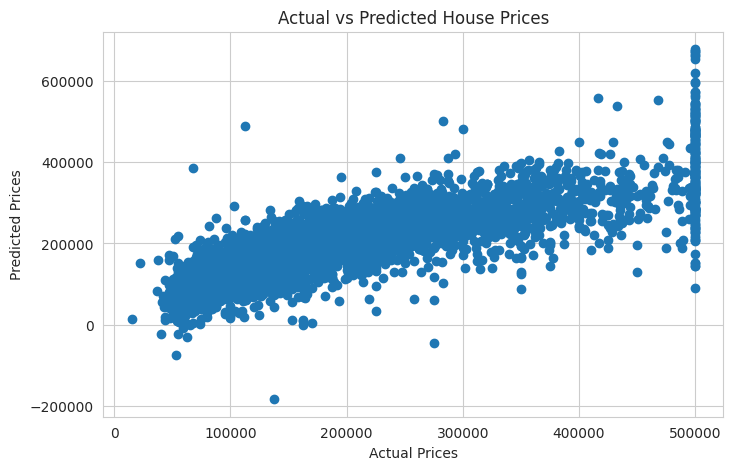

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Final Conclusion

## Final Conclusion

The housing dataset was successfully preprocessed by handling missing values
and encoding categorical features using one-hot encoding.

A Linear Regression model was trained to predict median house prices
based on property-related features such as location, income level,
house age, and room distribution.

Model Evaluation Results:
- Mean Absolute Error (MAE): Indicates the average prediction error in dollar value.
- Root Mean Squared Error (RMSE): Penalizes larger errors and provides a clearer measure of model performance.

The predicted vs actual values plot shows a positive linear relationship,
suggesting that the model captures overall pricing trends effectively.

However, some variance remains, indicating that more advanced models
(e.g., Gradient Boosting) could further improve accuracy.

Overall, the model provides a reasonable baseline for house price prediction.
